<a href="https://colab.research.google.com/github/yebiny/Lecture_deeplearning_basic/blob/main/1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀 (Linear Regression)
>**목차**
1. 개념정리
2. 손실함수: 평균제곱오차 (Mean Squared Error)
3. 최적화: 경사하강법 (Gradient Descent) 
4. 실습1: 단순선형회귀분석(Simple Linear Regression Analysis)
5. 실습2: 다중선형회귀분석(Multiple Linear Regression Analysis)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---

</br>

###<center> < 가설 > </center>
###  <center>$f(x_i)=wx_i+b$</center>

</br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-f(x_i) )^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-wx_i-b)^2$</center>

### **구현**


In [ ]:
def hypothesis(x, w=1, b=0):
  return w*x+b

### **예제**

|공부시간|종합점수|
|------|---|
|1|1.1|
|2|1.2|
|3|2.2|
|4|3.1|
|5|3.7|

* 데이터 정의

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([1.1, 1.2, 2.2, 3.1, 3.7])


* 예측

In [ ]:
y_pred = hypothesis(x, w=1)
print(y_pred)

[1 2 3 4 5]


* 시각화

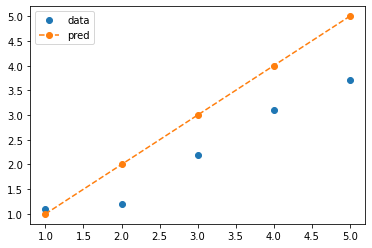

In [ ]:
plt.plot(x, y, marker ='o', linestyle ='')
plt.plot(x, y_pred, marker ='o', linestyle ='--')
plt.legend(["data", "pred"])
plt.show()

## 2. 손실함수: 평균제곱오차 (Mean Squred Error)
---

</br>

### <center>$ MSE = \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>

### <center>$=\sum_{i=1}^m(y_i-wx_i-b)^2$

### **구현**

In [ ]:
def MSE(y, y_pred):
  l = 0
  for yi, yi_pred in zip(y, y_pred):
    l += (yi-yi_pred)**2
  return l

# def MSE(y, y_pred):
#   return sum([(yi-yi_pred)**2 for yi, yi_pred in zip(y, y_pred)])


* 계산

In [ ]:
error = MSE(y, y_pred)
print(error)
print(y, y_pred)

3.789999999999999
[1.1 1.2 2.2 3.1 3.7] [1 2 3 4 5]


### **Error 시각화**

*  W 값에 따른 Error 값 변화

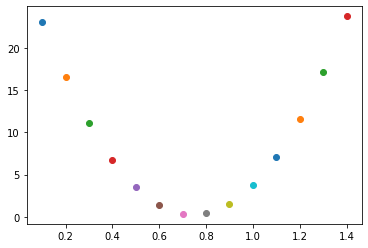

In [ ]:
w_array = np.arange(0.1, 1.5, 0.1)
for w in w_array:
  y_pred = hypothesis(x,w)
  error = MSE(y, y_pred)
  plt.plot(w, error, marker = 'o')
plt.show()

## 3. 최적화: 경사하강법 ( Gradient Desent )
---
</br>

## <center>$w^* =  w-\alpha\frac{\theta }{\theta w}Cost(w) $</center>


<center> 기울기가 음수일 때: $\frac{\theta }{\theta w}Cost(w) < 0 \rightarrow w* = w+\alpha*(기울기)$</center>
<center>기울기가 음수이면 $w$는 지금보다 큰 값으로 업데이트</center>

</br>

<center> 기울기가 양수일 때: $\frac{\theta }{\theta w}Cost(w) > 0 \rightarrow w* = w-\alpha*(기울기)$</center>
<center>기울기가 양수이면 $w$는 지금보다 작은 값으로 업데이트</center>


### **구현**

In [ ]:
# MSE = (yi-(wxi+b))**2
# b=0이라고 가정
def diff(xi, yi, w):
  return 2*(xi**2)*w-2*xi*yi

# y_pred = f(x) =wx+b
def GD(xi, yi, w, alpha= 0.01):
  return w-(alpha*diff(xi, yi, w))

### **학습**

In [ ]:
xi = x[0]
yi = y[0]
w_new = 1
print(w_new)

for xi, yi in zip(x, y):
  w_new = GD(xi, yi, w)
  print(w_new)

1
1.3940000000000001
1.336
1.28
1.2000000000000002
1.07


### **파라미터**: $\alpha$ 값에 따른 W 변화

In [ ]:
w_new = 1
print(w_new)
for xi, yi in zip(x, y):
  w_new = GD(xi, yi, w_new, alpha=0.1)
  print(w_new)

1
1.02
0.6839999999999999
0.7728000000000002
0.7798399999999998
0.5806400000000007


## 4. 실습1: 단순 선형 회귀 분석(Simple Linear Regression Analysis)
---

<br>

###  <center>$f(x_i)=wx_i+b$</center>



### **데이터**

|공부시간|종합점수|
|------|---|
|0|0|
|1|11|
|2|23|
|3|30|
|4|44|
|5|55|
|6|61|
|7|73|
|8|84|
|9|98|



* 데이터 정의

In [ ]:
x= np.array([0,1,2,3,4,5,6,7,8,9])
y=np.array([0,11,23,30,44,55,61,73,84,98])

x.shape,  y.shape

((10,), (10,))

* 시각화

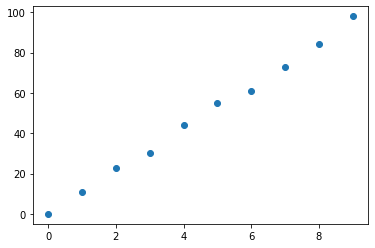

In [ ]:
plt.plot(x, y, linestyle='',marker='o')
plt.show()

### **모델 생성**

* 케라스를 이용한 모델 구현

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim = 1, activation = 'linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* 학습파라미터 확인

In [ ]:
print(model.get_weights())
print("W:", model.get_weights()[0], "b:", model.get_weights()[1])

[array([[0.08998907]], dtype=float32), array([0.], dtype=float32)]
W: [[0.08998907]] b: [0.]


* 학습파라미터 시각화

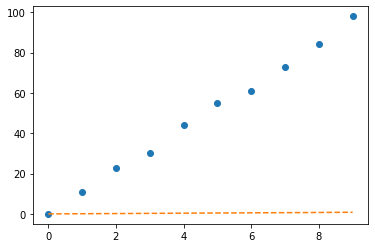

In [ ]:
y_pred = model.predict(x)

plt.plot(x, y, linestyle='',marker='o')
plt.plot(x, y_pred, linestyle='--')
plt.show()

### **학습**

* 모델 컴파일

In [ ]:
model.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.01))

* 학습 진행

In [ ]:
model.fit(x,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 224ms/step - loss: 3167.8157
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 550.0813
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 97.8296
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 19.6923
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 6.1881
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 3.8502
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 3.4414
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 3.3660
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 3.3482
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 3.3404


### **결과**

* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
print("W:", model.get_weights()[0], "b:", model.get_weights()[1])

[array([[10.377677]], dtype=float32), array([1.5624641], dtype=float32)]
W: [[10.377677]] b: [1.5624641]


* 시각화

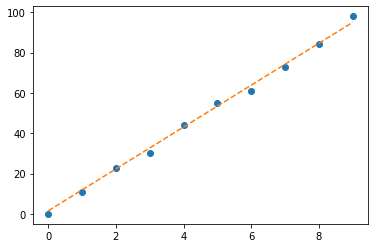

In [ ]:
y_pred = model.predict(x)

plt.plot(x, y, linestyle='',marker='o')
plt.plot(x, y_pred, linestyle='--')
plt.show()

* 결과예측

In [ ]:
x=[10,11]
model.predict(x)

array([[105.33923],
       [115.71691]], dtype=float32)

## 5. 실습2: 다중선형회귀 (Multiple Linear Regression Analysis)
---
<br>

###  <center>$f(\vec{x_i})=\vec{x}_iW+b$</center>

### **데이터**
|공부시간|집중도|수면시간|종합성적|
|------|---|---|---|
|0|1|9|0|
|1|1|8.5|11|
|2|2|8|23|
|3|4|8|30|
|4|3|7|44|
|5|5|7.5|55|
|6|6|7|61|
|7|6|6|73|
|8|7|7|84|
|9|6|6.5|98|



* 데이터 정의

In [ ]:
x=np.array([[0,1,9],
            [1,1,8.5],
            [2,2,8],
            [3,4,8],
            [4,3,7],
            [5,5,7.5],
           [6,6,7],
            [7,6,6],
            [8,7,7],
            [9,6,6.5]])
y=np.array([0,11,23,30,44,55,61,73,84,98])

x.shape, y.shape

((10, 3), (10,))

### **모델 생성**

* 케라스를 이용한 모델 생성

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim = 3, activation = 'linear'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
print("W:", model.get_weights()[0], "b:", model.get_weights()[1])

[array([[0.2994126 ],
       [1.1919702 ],
       [0.05735445]], dtype=float32), array([0.], dtype=float32)]
W: [[0.2994126 ]
 [1.1919702 ]
 [0.05735445]] b: [0.]


### **학습**

* 모델 컴파일

In [ ]:
model.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.01))

* 학습 진행

In [ ]:
model.fit(x,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 233ms/step - loss: 2446.6133
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 2038.7047
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 1716.3254
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 1456.6333
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 1244.0309
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1067.6553
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 919.7760
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 794.7560
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 688.3851
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 597.4403


### **결과**

* 학습 파라미터 확인

In [ ]:
print(model.get_weights())
print("W:", model.get_weights()[0], "b:", model.get_weights()[1])

[array([[ 5.170927 ],
       [ 3.9413843],
       [-1.7440518]], dtype=float32), array([-0.04559993], dtype=float32)]
W: [[ 5.170927 ]
 [ 3.9413843]
 [-1.7440518]] b: [-0.04559993]


* 결과 예측

In [ ]:
x=[[10,11,12]]
model.predict(x)

array([[74.09028]], dtype=float32)